# Customer Churn Prediction-Telecom Sector

![Picture title](image-20221014-185110.png)

![Picture title](image-20221014-183926.png)

# Problem Statement

What is Customer Churn?
Customer churn is the percentage of customers that stopped using company's product or service during a certain time frame. Customer churn is one of the most important metrics for a growing business to evaluate as it is much less expensive to retain existing customers than it is to acquire new customers. Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next.

Customer churn is extremely costly for companies. To reduce customer churn, telecom companies should predict which customers are highly prone to churn. So machine learning techniques and algorithm plays an important role for companies in today’s commercial conditions because gaining a new  customer’s  cost is more than retaining the existing ones.  This project focuses on various machine learning techniques for predicting customer churn through which we can build the classification models such as Logistic Regression, Random Forest and lazy learning and also compare the performance of these models.

# Import Libraries

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
#%matplotlib.inline
import missingno as msno
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from collections import Counter
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier
!pip install xgboost

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install missingno


You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


# Importing Dataset

In [3]:
df = pd.read_csv('/work/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()# To check top five records of the dataset

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [5]:
df.tail()# To check last five records of the dataset

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [6]:
df.shape

(7043, 21)

In [7]:
#For checking datatypes of all the columns
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
#For checking infomation about datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# For checking descriptive statistics of numerical columns
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

<AxesSubplot:>

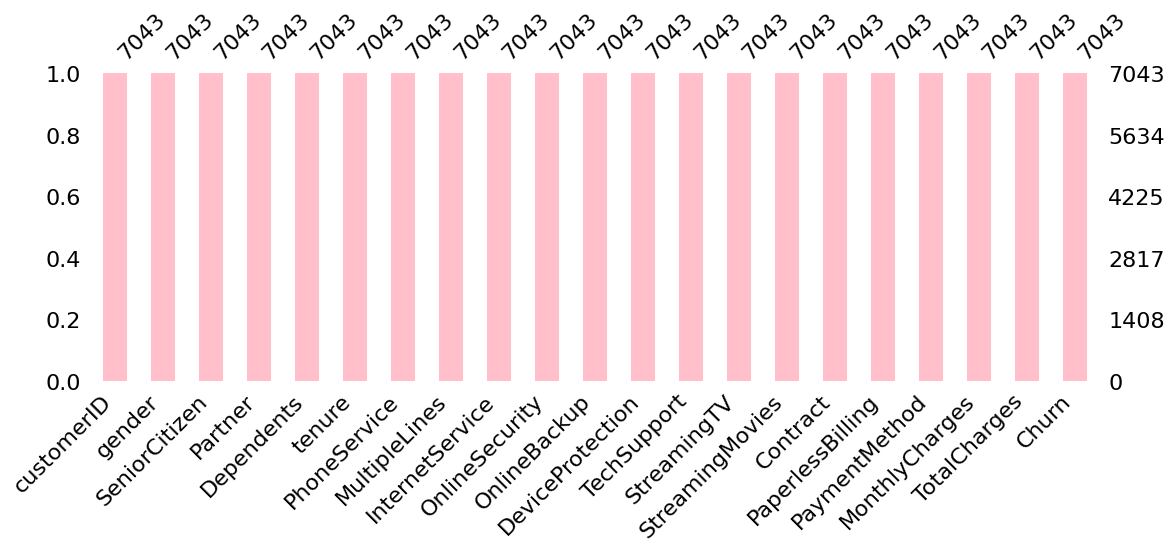

In [10]:
#For checking missing values 
msno.bar(df,figsize=(13,4),color='Pink')

Observation: As we can see there is no missing value in our dataset so we can proceed further and perform Exploratory Data Analysis on our dataset

# Exploratory Data Analysis (EDA)

In [11]:
#Now we will visulize our data by plottings various graphs as per the datatype.In this step we will perform Univariate analysis,Bivariate Analysis and Multivariate Analysis...

# Visualize our Target  variable in order to check whether data is imbalance or not. If our data is found to be imbalance we will perform SMOTE test or else we will proceed further in our analysis

Text(0.5, 1.0, 'Total Count of Target variable as per Category')

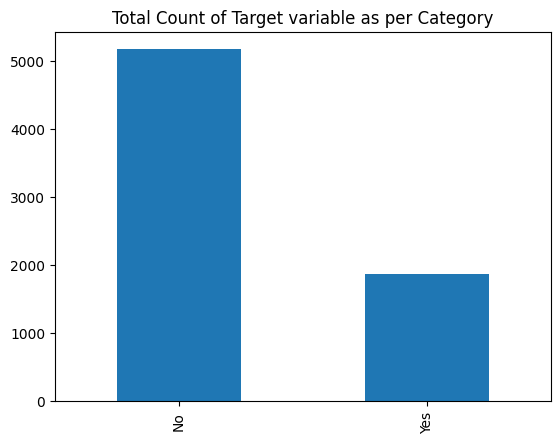

In [12]:
#fig.ax = plt.subplots(figsize=(10,8))
df['Churn'].value_counts().plot(kind ='bar')
plt.title("Total Count of Target variable as per Category")

# Data cleaning

In [13]:
df = df.copy()

In [14]:
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Observation: As we can see there are 11 missing values in TotalCharges column

Lets check these missing records

In [15]:
df.loc[df['TotalCharges'].isnull() == True]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

Observation: Since the % of these records compared to total dataset is very low i.e 0.15%, so we can ignore them for further processing

In [16]:
#Removing the missing value or drop it

In [17]:
df.dropna(how = 'any', inplace=True)

In [18]:
#Based on tenure divide customers into bins e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 years: tenure group of 13-24; so on

In [19]:
#To find the max tenure
print(df['tenure'].max())

72


In [20]:
#GRoup the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1,72,12)]
df ['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [21]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [22]:
#Removing columns not required for processing
#drop customerID and tenure columns
df.drop(columns= ['customerID', 'tenure'], axis=1, inplace=True)
df.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn tenure_group  
0           Electronic check           29.85         29.85    No       1 - 12  
1               Mailed check           56.95       1889.50    No      25 - 36  
2               Mailed check           53.85        108.15   Yes       1 - 12  
3  Bank transfer (automatic)           42.30       1840.75    No      37 - 48  
4           Electronic check           70.70        151.65   Yes       1 - 12

# Data Exploration: EDA

In [23]:
#checking our Categorical columns
df.select_dtypes(include='object').count()

gender              7032
Partner             7032
Dependents          7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
Churn               7032
dtype: int64

In [24]:
#checking our Categorical columns
df.select_dtypes(include='int64').count()

SeniorCitizen    7032
dtype: int64

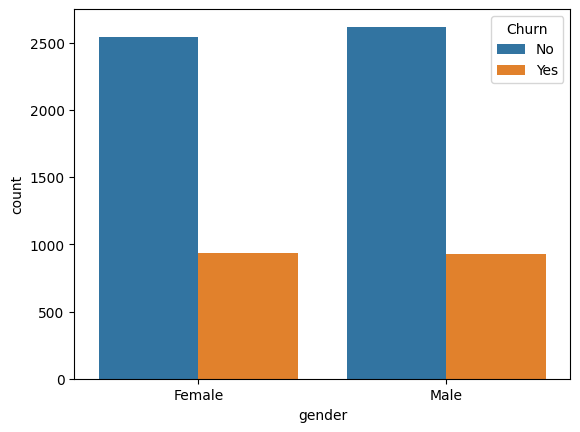

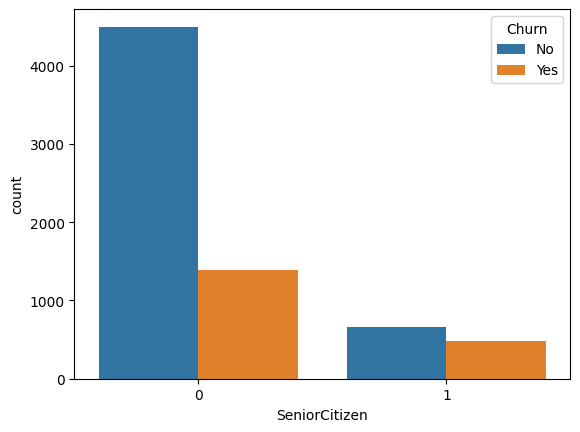

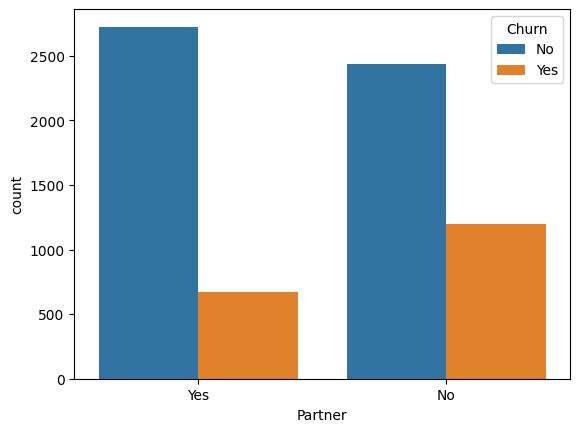

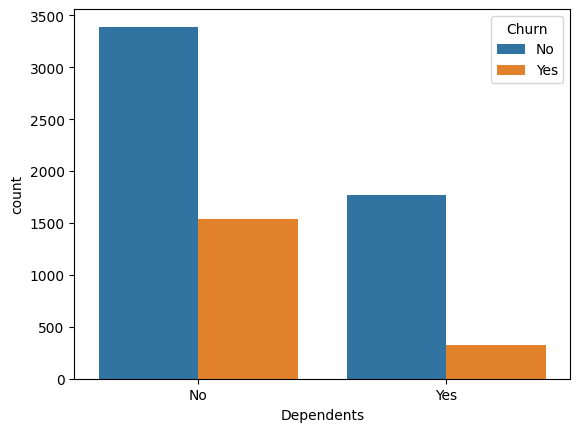

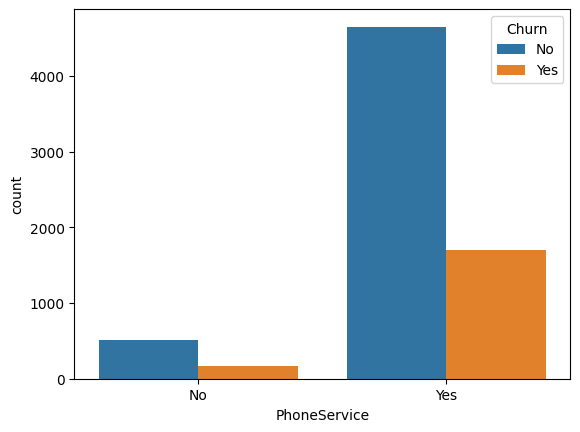

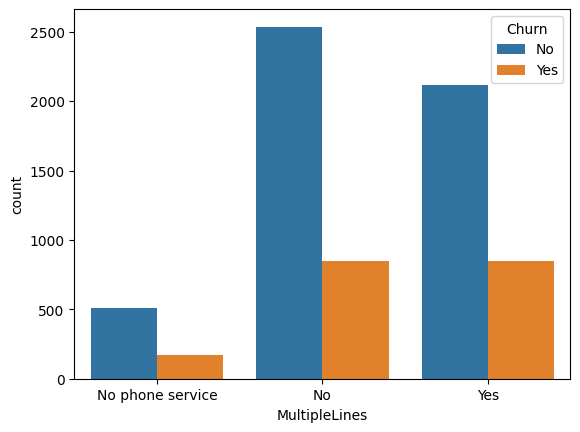

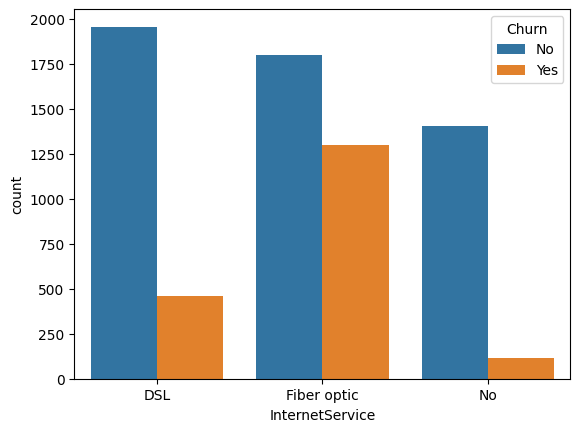

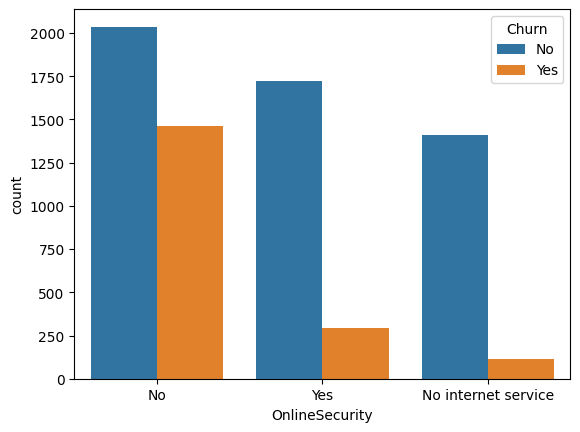

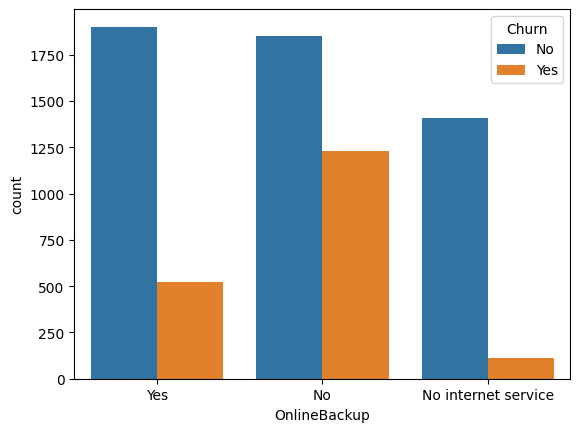

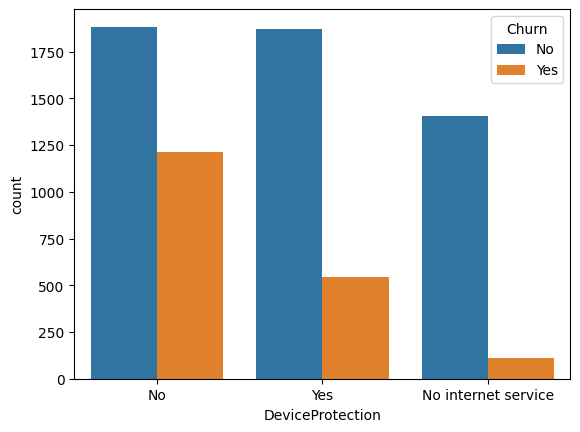

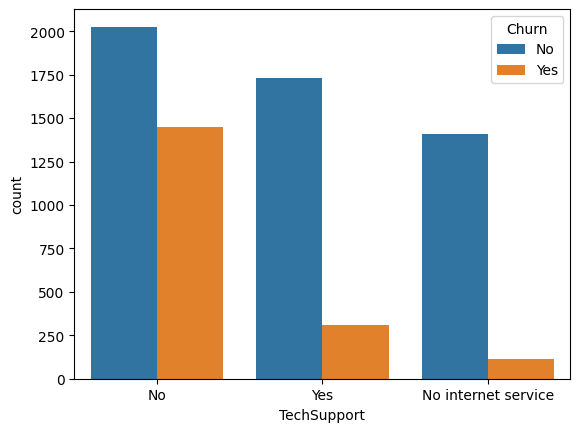

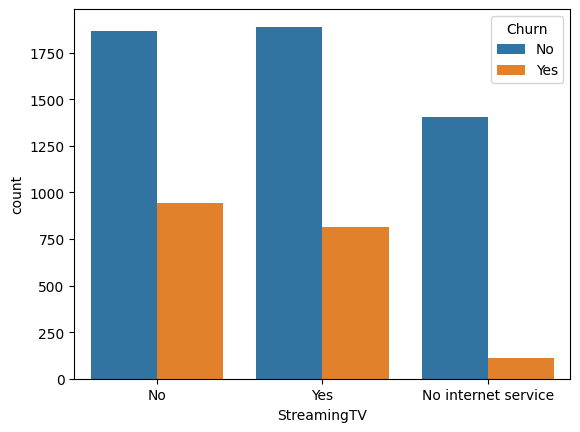

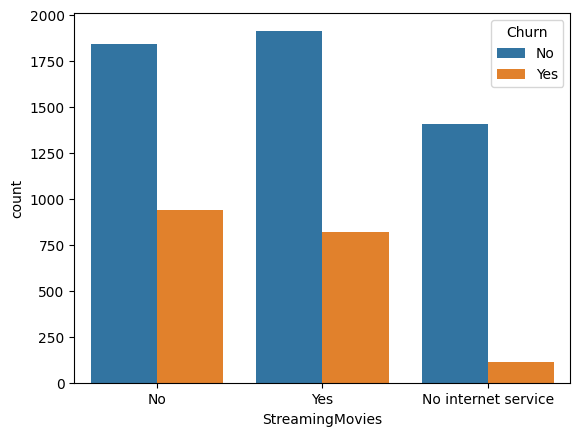

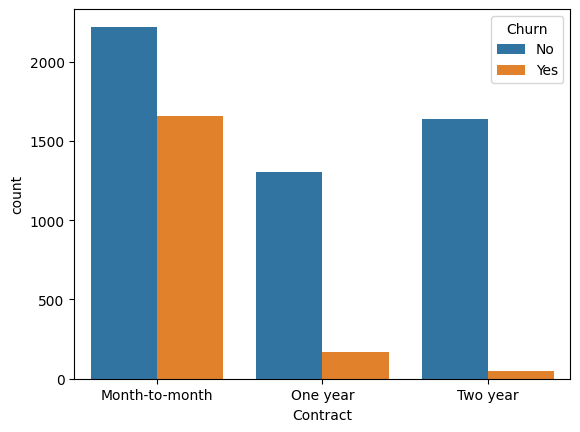

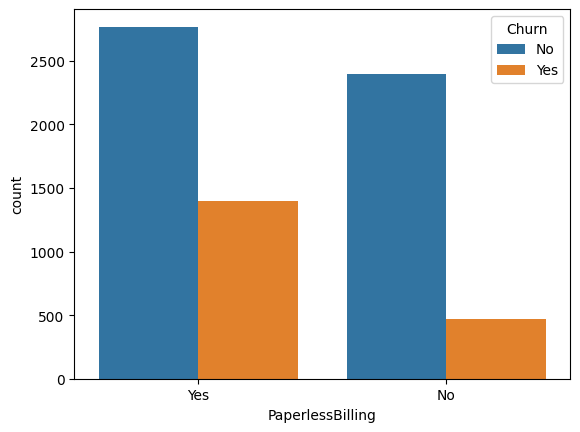

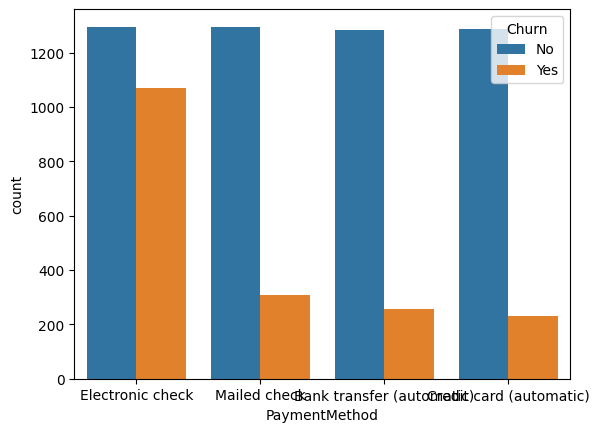

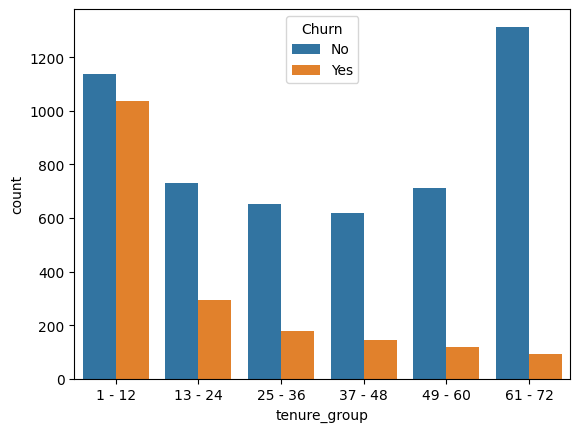

In [25]:
#Univariate Analysis
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

<AxesSubplot:ylabel='PaymentMethod'>

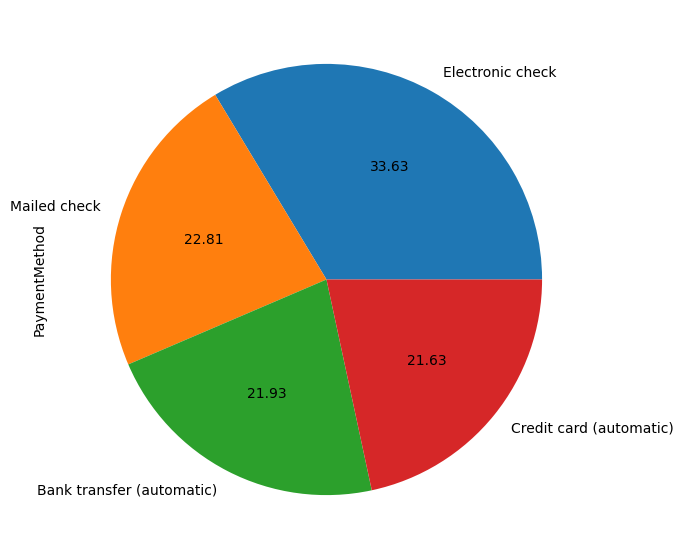

In [26]:
fig, ax = plt.subplots(figsize=(10,7))
df['PaymentMethod'].value_counts().plot(kind='pie',autopct='%.2f')

In [27]:
##Convert Target variable'Churn' in binary numeric variable i.e.Yes=1;No=0
df['Churn'] = np.where(df.Churn == 'Yes',1,0)
df.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  Churn tenure_group  
0           Electronic check           29.85         29.85      0       1 - 12  
1               Mailed check           56.95       1889.50      0      25 - 36  
2               Mailed check           53.85        108.15      1       1 - 12  
3  Bank transfer (automatic)           42.30       1840.75      0      37 - 48  
4           Electronic check           70.70        151.65      1       1 - 12

In [28]:
#Convert all the categorical variables into dummy variables using Onehotencoding(OHE)
df_dummies = pd.get_dummies(df)
df_dummies.head()

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0           29.85         29.85      0              1   
1              0           56.95       1889.50      0              0   
2              0           53.85        108.15      1              0   
3              0           42.30       1840.75      0              0   
4              0           70.70        151.65      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0            0           0            1              1               0  ...   
1            1           1            0              1               0  ...   
2            1           1            0              1               0  ...   
3            1           1            0              1               0  ...   
4            0           1            0              1               0  ...   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  tenure_group_1 - 12  tenure_group_13 - 24  \
0                           0                    1                     0   
1                           1                    0                     0   
2                           1                    1                     0   
3                           0                    0                     0   
4                           0                    1                     0   

   tenure_group_25 - 36  tenure_group_37 - 48  tenure_group_49 - 60  \
0                     0                     0                     0   
1                     1                     0                     0   
2                     0                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   tenure_group_61 - 72  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 51 columns]

# Insights from Numeric Columns

(array([1600.,  191.,  365.,  637.,  472.,  894.,  952.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

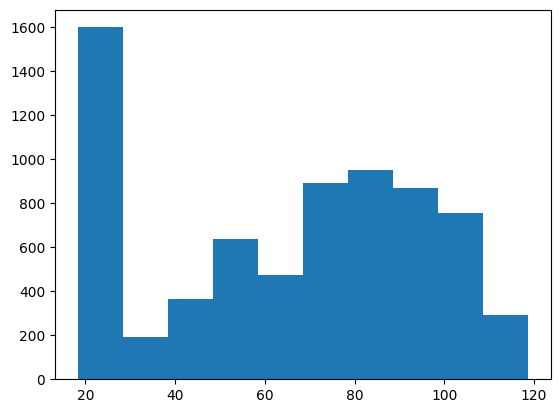

In [29]:
plt.hist(df['MonthlyCharges'])

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

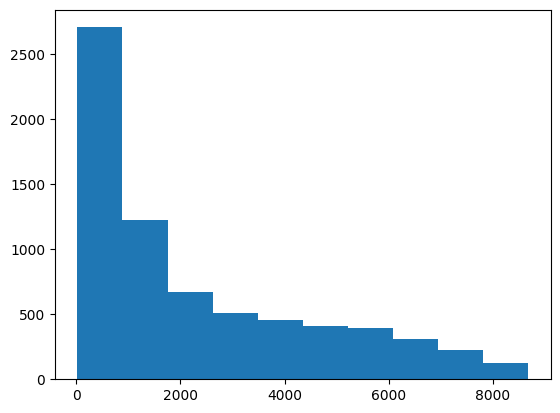

In [30]:
plt.hist(df['TotalCharges'])

# Relationship between Monthly Charges and TotalCharges

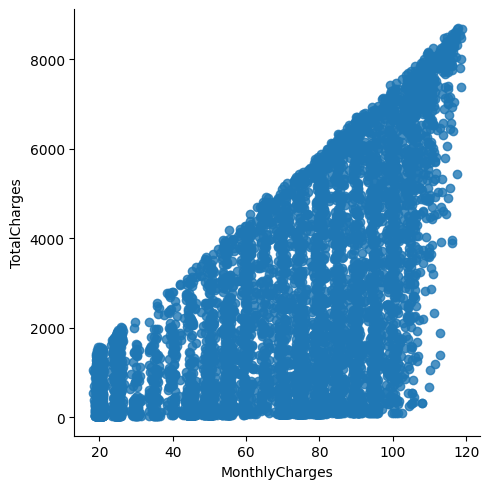

In [31]:
sns.lmplot(data = df_dummies, x='MonthlyCharges',y='TotalCharges',fit_reg=False)

Observation: As expected TotalCharges increase as Monthly Charges increase

/tmp/ipykernel_662/2177865203.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0)],
/tmp/ipykernel_662/2177865203.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1)],


Text(0.5, 1.0, 'Monthly Charges by Churn')

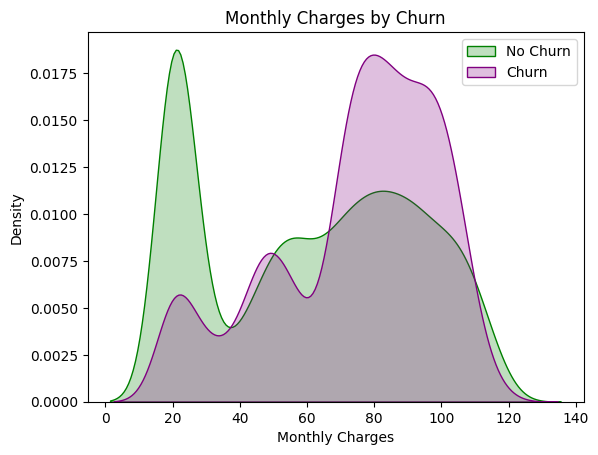

In [32]:
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0)],
                color ="Green", shade = True)
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1)],
                ax=Mth,color="Purple", shade=True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title("Monthly Charges by Churn")

Observation: As we can see Churn is high when monthly charges are high. so whenever monthly charges are high churn would be higher

/tmp/ipykernel_662/382360663.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0)],
/tmp/ipykernel_662/382360663.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1)],


Text(0.5, 1.0, 'Total Charges by Churn')

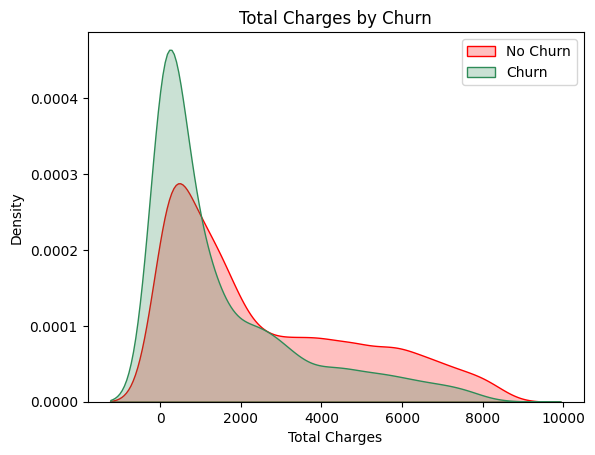

In [33]:
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0)],
                color ="Red", shade = True)
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1)],
                ax=Tot,color="SeaGreen", shade=True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title("Total Charges by Churn")

Observation: Higher churn at lower total charges

<AxesSubplot:>

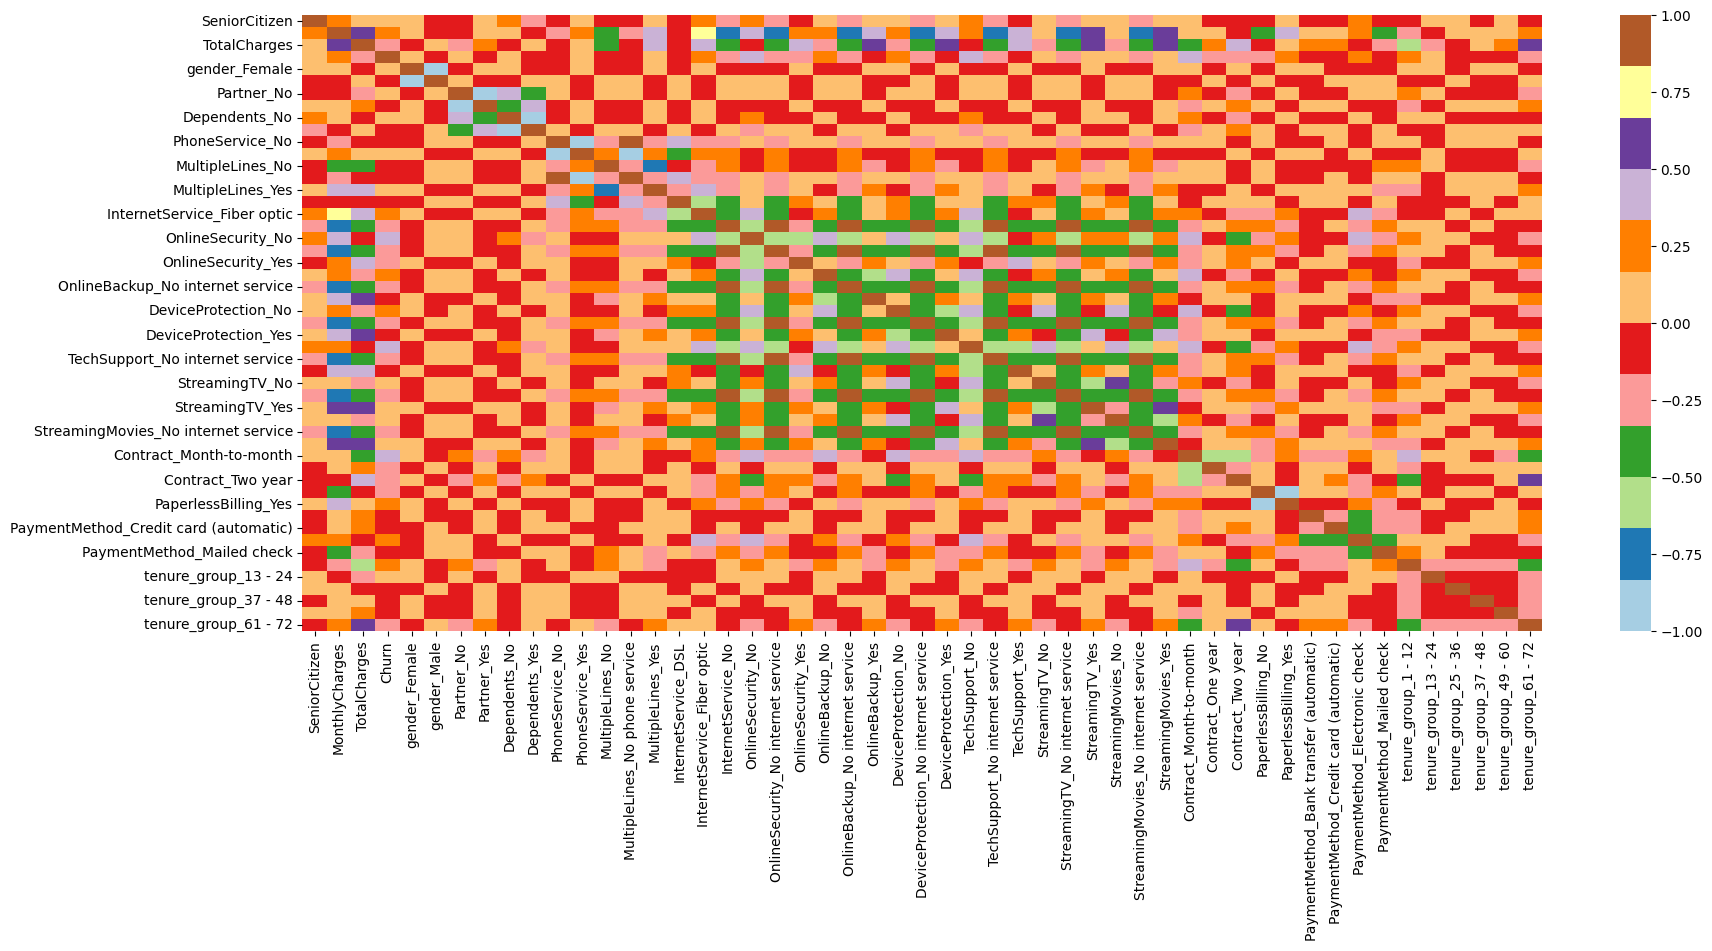

In [34]:
# Build a correlation of all predictors with Churn
plt.figure(figsize=(20,8))
#cmap= sns.cubehelix_palette()
sns.heatmap(df_dummies.corr(),cmap="Paired")


# EDA using Bivariate Analysis

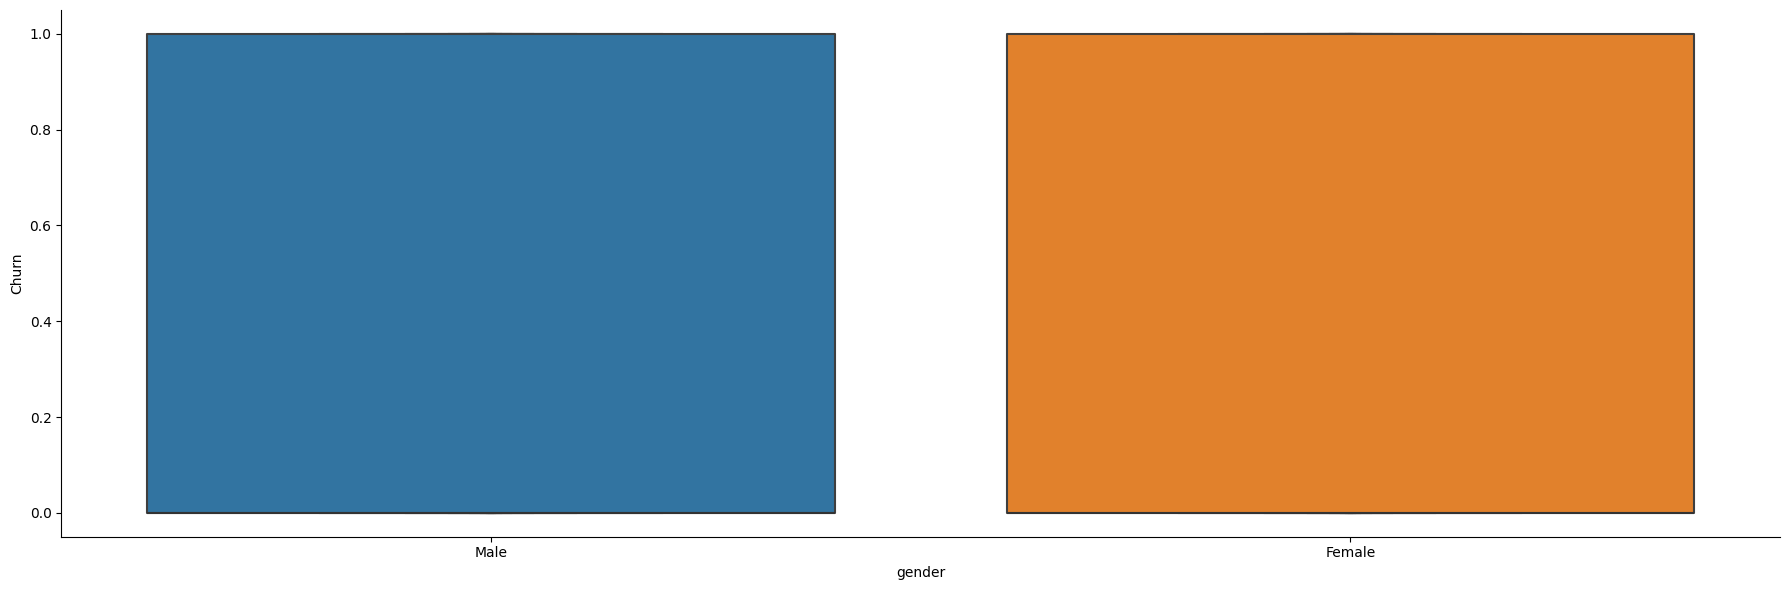

In [35]:
sns.catplot(y ='Churn',x='gender',data=df.sort_values("Churn",ascending = False),kind="boxen",height = 6,aspect = 3)
plt.show()

In [36]:
new_df1_target0=df.loc[df["Churn"]==0]
new_df1_target1=df.loc[df["Churn"]==1]


In [37]:
def uniplot(df,col,title,hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30

    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 +4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df,x=col, order=df[col].value_counts().index,hue =hue,palette='bright')
    plt.show()

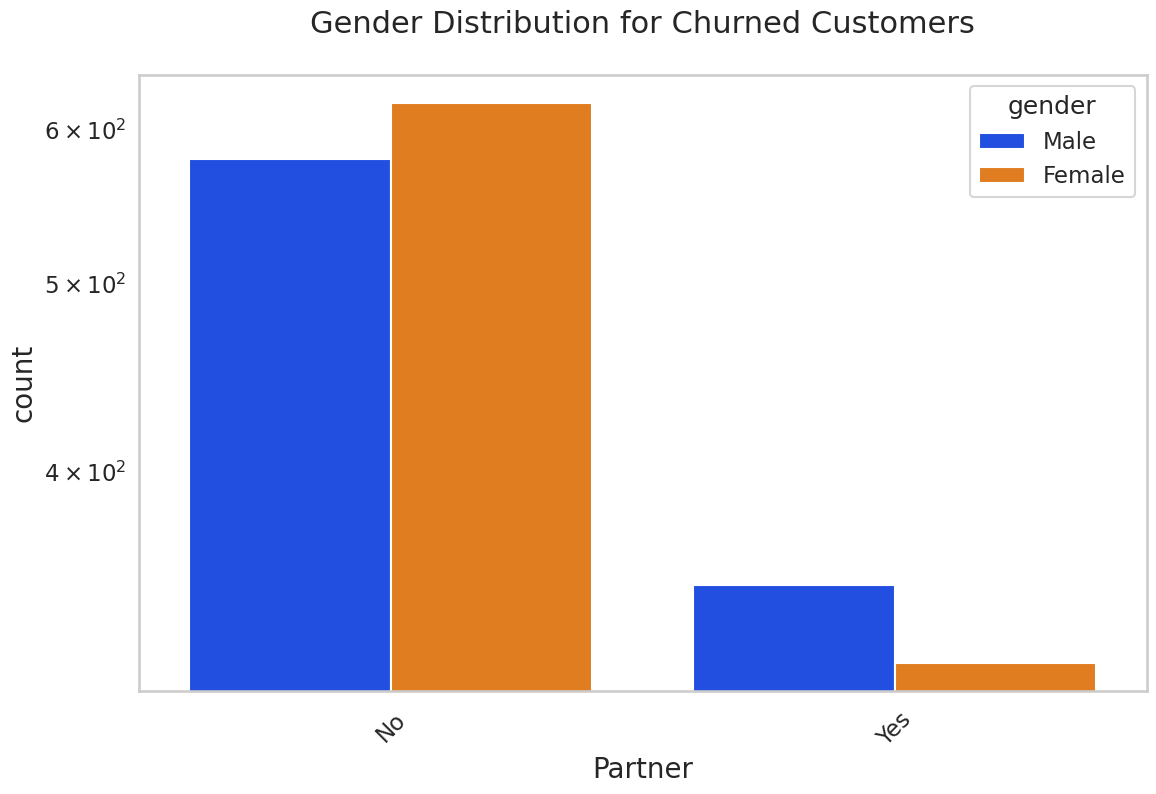

In [38]:
uniplot(new_df1_target1,col='Partner',title='Gender Distribution for Churned Customers', hue='gender')

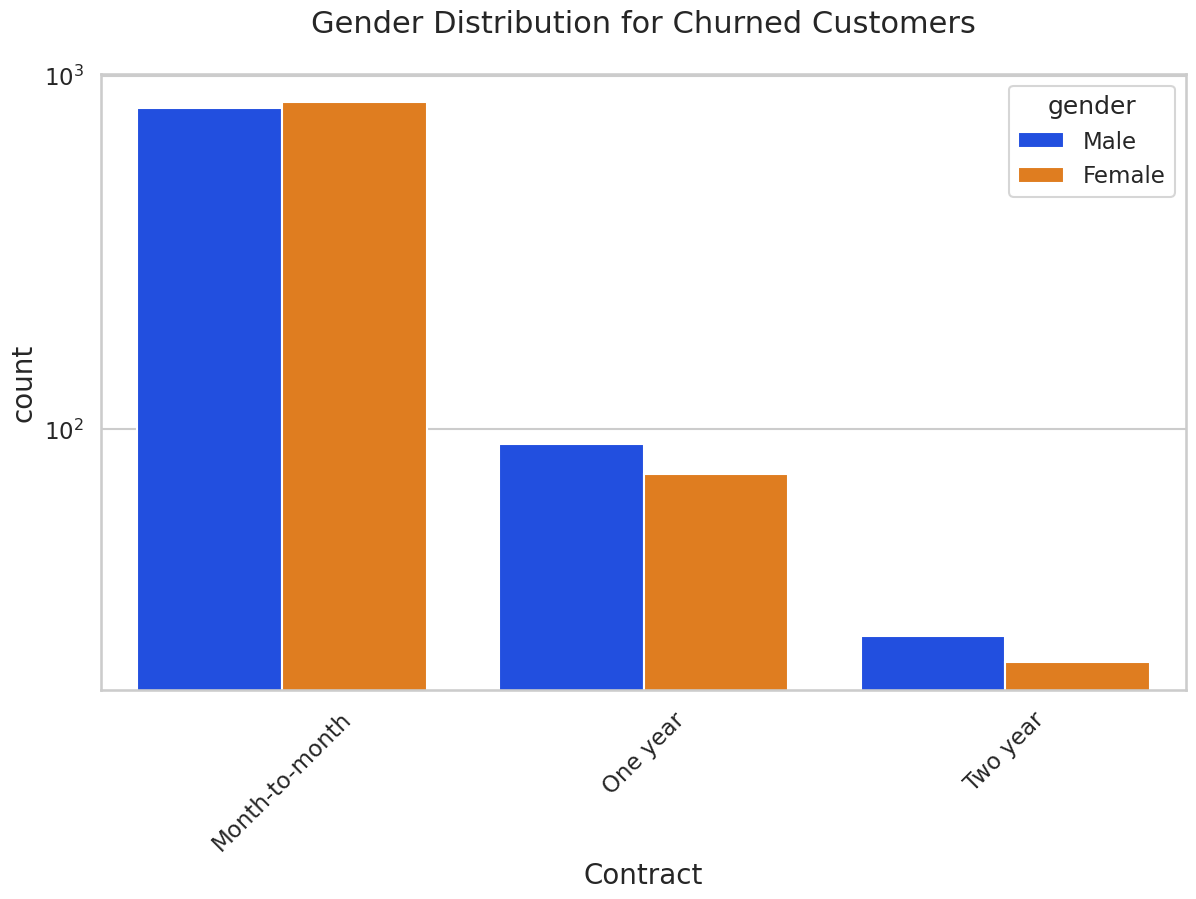

In [39]:
uniplot(new_df1_target1,col='Contract',title='Gender Distribution for Churned Customers', hue='gender')

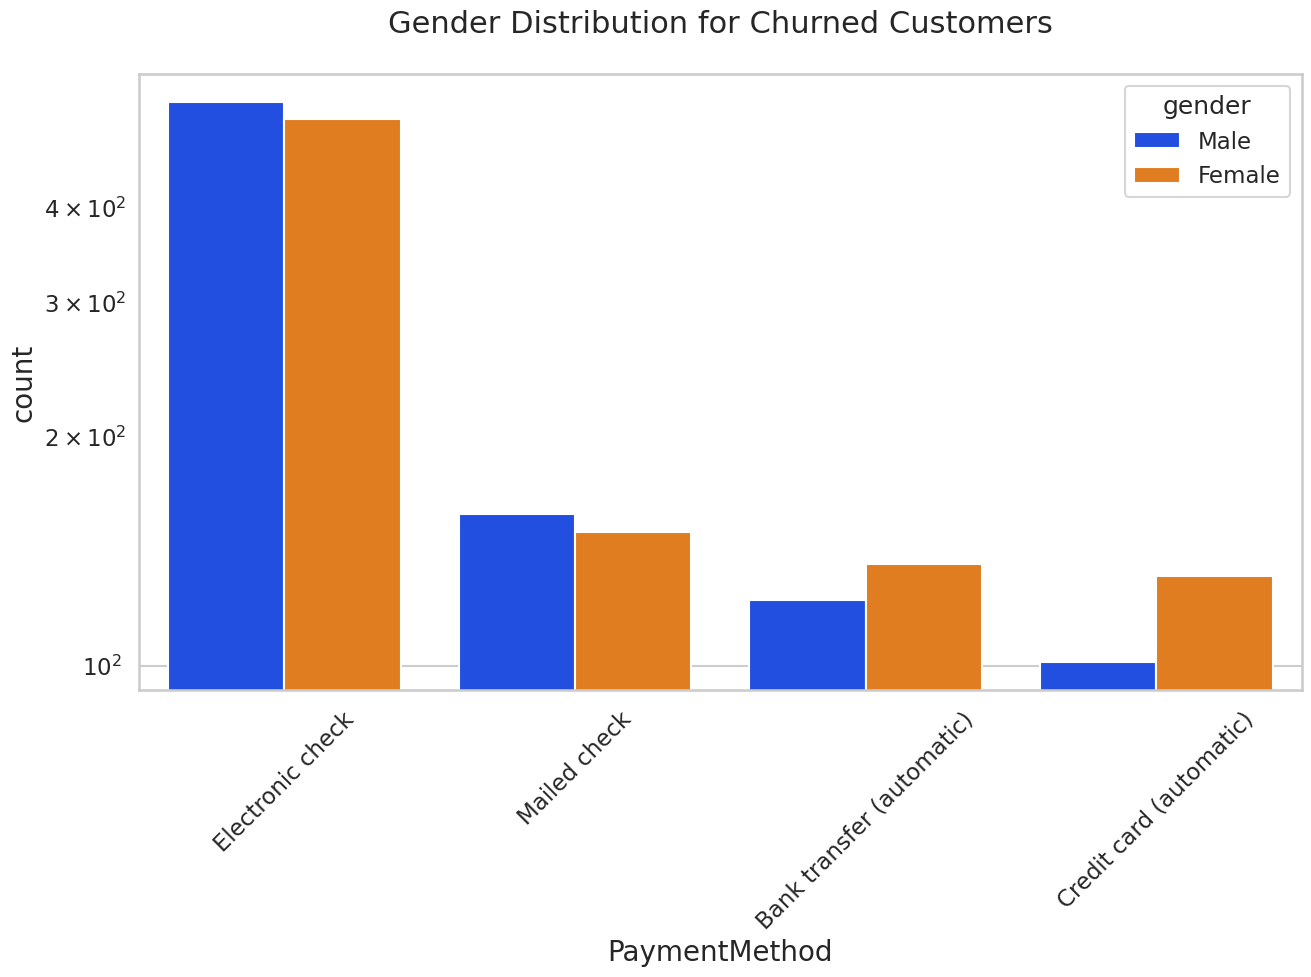

In [40]:
uniplot(new_df1_target1,col='PaymentMethod',title='Gender Distribution for Churned Customers', hue='gender')

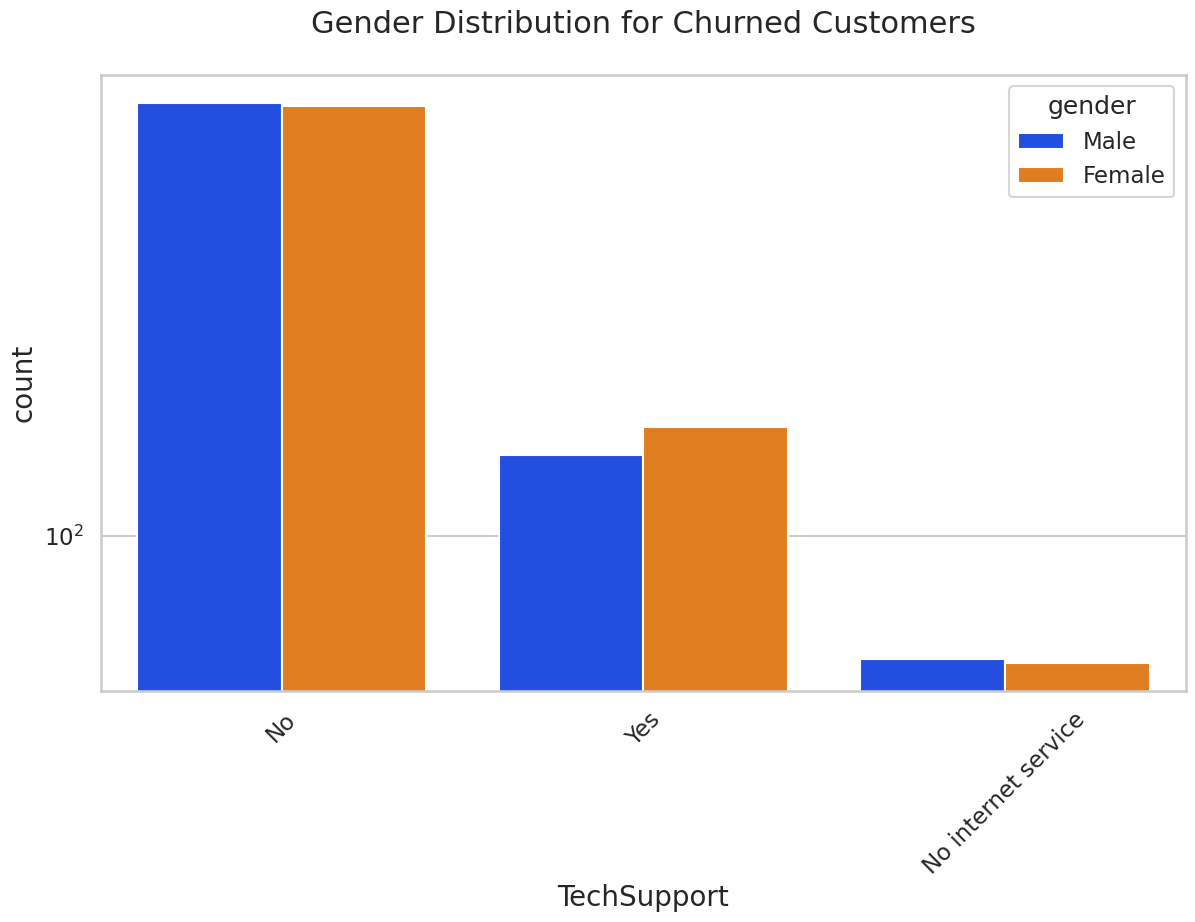

In [41]:
uniplot(new_df1_target1,col='TechSupport',title='Gender Distribution for Churned Customers', hue='gender')

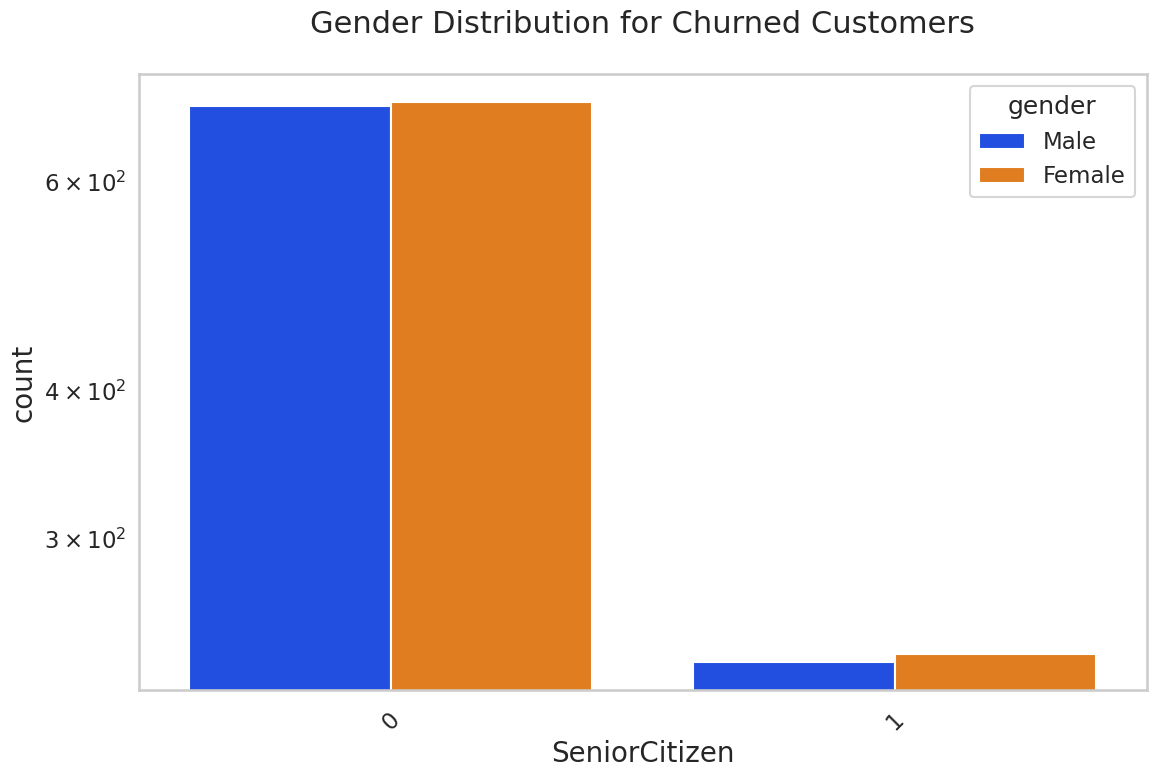

In [42]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Gender Distribution for Churned Customers', hue='gender')

Observations:

Electronic check medium are the highest churners

Contract type: Monthly customers are more likely to churn because of no contract terms, as they are free  to go customers

No online security, No Tech Support category are high churners

Non senior Citizens are high churners

In [43]:
df_dummies.to_csv('tel_churn.csv')

# Churn Prediction Model

Importing necessary libraries

In [44]:
!pip install imblearn==0.0

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [45]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [46]:
df=pd.read_csv("tel_churn.csv")
df.head()

Unnamed: 0  SeniorCitizen  MonthlyCharges  TotalCharges  Churn  \
0           0              0           29.85         29.85      0   
1           1              0           56.95       1889.50      0   
2           2              0           53.85        108.15      1   
3           3              0           42.30       1840.75      0   
4           4              0           70.70        151.65      1   

   gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0              1            0           0            1              1  ...   
1              0            1           1            0              1  ...   
2              0            1           1            0              1  ...   
3              0            1           1            0              1  ...   
4              1            0           1            0              1  ...   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  tenure_group_1 - 12  tenure_group_13 - 24  \
0                           0                    1                     0   
1                           1                    0                     0   
2                           1                    1                     0   
3                           0                    0                     0   
4                           0                    1                     0   

   tenure_group_25 - 36  tenure_group_37 - 48  tenure_group_49 - 60  \
0                     0                     0                     0   
1                     1                     0                     0   
2                     0                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   tenure_group_61 - 72  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 52 columns]

Drop unwanted columns

In [47]:
df=df.drop('Unnamed: 0',axis=1)

In [48]:
# to recheck dataset after droping unwanted column
df

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0                 0           29.85         29.85      0              1   
1                 0           56.95       1889.50      0              0   
2                 0           53.85        108.15      1              0   
3                 0           42.30       1840.75      0              0   
4                 0           70.70        151.65      1              1   
...             ...             ...           ...    ...            ...   
7027              0           84.80       1990.50      0              0   
7028              0          103.20       7362.90      0              1   
7029              0           29.60        346.45      0              1   
7030              1           74.40        306.60      1              0   
7031              0          105.65       6844.50      0              0   

      gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
0               0           0            1              1               0   
1               1           1            0              1               0   
2               1           1            0              1               0   
3               1           1            0              1               0   
4               0           1            0              1               0   
...           ...         ...          ...            ...             ...   
7027            1           0            1              0               1   
7028            0           0            1              0               1   
7029            0           0            1              0               1   
7030            1           0            1              1               0   
7031            1           1            0              1               0   

      ...  PaymentMethod_Bank transfer (automatic)  \
0     ...                                        0   
1     ...                                        0   
2     ...                                        0   
3     ...                                        1   
4     ...                                        0   
...   ...                                      ...   
7027  ...                                        0   
7028  ...                                        0   
7029  ...                                        0   
7030  ...                                        0   
7031  ...                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               1   
...                                     ...                             ...   
7027                                      0                               0   
7028                                      1                               0   
7029                                      0                               1   
7030                                      0                               0   
7031                                      0                               0   

      PaymentMethod_Mailed check  tenure_group_1 - 12  tenure_group_13 - 24  \
0                              0                    1                     0   
1                              1                    0                     0   
2                              1                    1                     0   
3                              0                    0                     0   
4                              0                    1                     0   
...                          ...                  ...                   ...   
7027                         

In [49]:
x=df.drop('Churn',axis=1)
x

SeniorCitizen  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0                 0           29.85         29.85              1            0   
1                 0           56.95       1889.50              0            1   
2                 0           53.85        108.15              0            1   
3                 0           42.30       1840.75              0            1   
4                 0           70.70        151.65              1            0   
...             ...             ...           ...            ...          ...   
7027              0           84.80       1990.50              0            1   
7028              0          103.20       7362.90              1            0   
7029              0           29.60        346.45              1            0   
7030              1           74.40        306.60              0            1   
7031              0          105.65       6844.50              0            1   

      Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
0              0            1              1               0                1   
1              1            0              1               0                0   
2              1            0              1               0                0   
3              1            0              1               0                1   
4              1            0              1               0                0   
...          ...          ...            ...             ...              ...   
7027           0            1              0               1                0   
7028           0            1              0               1                0   
7029           0            1              0               1                1   
7030           0            1              1               0                0   
7031           1            0              1               0                0   

      ...  PaymentMethod_Bank transfer (automatic)  \
0     ...                                        0   
1     ...                                        0   
2     ...                                        0   
3     ...                                        1   
4     ...                                        0   
...   ...                                      ...   
7027  ...                                        0   
7028  ...                                        0   
7029  ...                                        0   
7030  ...                                        0   
7031  ...                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               1   
...                                     ...                             ...   
7027                                      0                               0   
7028                                      1                               0   
7029                                      0                               1   
7030                                      0                               0   
7031                                      0                               0   

      PaymentMethod_Mailed check  tenure_group_1 - 12  tenure_group_13 - 24  \
0                              0                    1                     0   
1                              1                    0                     0   
2                              1                    1                     0   
3                              0                    0                     0   
4                              0                    1              

In [50]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

# Train Test Split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#                      Decision Tree Classifier

In [52]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [53]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [54]:
DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [55]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [56]:
model_dt.score(x_test,y_test)

0.7860696517412935

In [57]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1016
           1       0.65      0.50      0.56       391

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.77      0.79      0.78      1407



Observation:

As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = {"max_depth": [3,5, None],
              "n_estimators":[3,5,10],
              "max_features": [5,6,7,8]}

# Creating the classifier
model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )

In [69]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=2,
                                              max_features=3, n_estimators=10,
                                              n_jobs=1, random_state=3,
                                              verbose=1),
             param_grid={'max_depth': [3, 5, None],
                         'max_features': [5, 6, 7, 8],
                         'n_estimators': [3, 5, 10]},
             scoring='recall')

In [70]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.49899665551839467
{'max_depth': None, 'max_features': 8, 'n_estimators': 3}


In [71]:
rf = RandomForestClassifier(max_depth=5, max_features = 7, n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=7, n_estimators=10)

In [72]:
print("Training score data: ")
print(rf.score(X_train, y_train))

Training score data: 
0.8003555555555556


In [75]:
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print_results("RF classification", y_test, y_pred)

[[954  79]
 [200 174]]
RF classification
accuracy: 0.8017057569296375
precision: 0.6877470355731226
recall: 0.46524064171123
f2: 0.4974271012006861


In [78]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [79]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [80]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [81]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9259896729776248
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       523
           1       0.95      0.91      0.93       639

    accuracy                           0.93      1162
   macro avg       0.92      0.93      0.93      1162
weighted avg       0.93      0.93      0.93      1162



In [82]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[494  29]
 [ 57 582]]


Observation:

Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.
Let's try with some other classifier.

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
param_grid = {"max_depth": [3,5, None],
              "n_estimators":[3,5,10],
              "max_features": [5,6,7,8]}

# Creating the classifier
model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )

In [86]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=2,
                                              max_features=3, n_estimators=10,
                                              n_jobs=1, random_state=3,
                                              verbose=1),
             param_grid={'max_depth': [3, 5, None],
                         'max_features': [5, 6, 7, 8],
                         'n_estimators': [3, 5, 10]},
             scoring='recall')

In [87]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.49899665551839467
{'max_depth': None, 'max_features': 8, 'n_estimators': 3}


In [88]:
rf = RandomForestClassifier(max_depth=5, max_features = 7, n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=7, n_estimators=10)

In [89]:
print("Training score data: ")
print(rf.score(X_train, y_train))

Training score data: 
0.8008888888888889


In [90]:
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print_results("RF classification", y_test, y_pred)

[[954  79]
 [194 180]]
RF classification
accuracy: 0.8059701492537313
precision: 0.694980694980695
recall: 0.48128342245989303
f2: 0.5128205128205128


In [93]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [94]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [95]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [96]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [97]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [98]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [99]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9376601195559351
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       530
           1       0.93      0.96      0.94       641

    accuracy                           0.94      1171
   macro avg       0.94      0.94      0.94      1171
weighted avg       0.94      0.94      0.94      1171



Observation:

Accuracy is found to be 93% 

With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.


In [106]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [107]:
# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 0.9400888888888889
Test accuracy of XgBoost is : 0.7896233120113717
[[913 120]
 [176 198]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



In [108]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [109]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [111]:
model_xgb_smote=XGBClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [112]:
model_xgb_smote.fit(xr_train1,yr_train1)

[09:25:20] WARNING: ../src/learner.cc:627: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              criterion='gini', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, min_samples_leaf=8, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=100, ...)

In [116]:
yr_predict1 = model_xgb_smote.predict(xr_test1)

In [115]:
model_score_r1 = model_xgb_smote.score(xr_test1, yr_test1)

In [117]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9629005059021922
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       523
           1       0.97      0.96      0.97       663

    accuracy                           0.96      1186
   macro avg       0.96      0.96      0.96      1186
weighted avg       0.96      0.96      0.96      1186



Observation:

Accuracy is found to be 96% 

With XGB Classifier, also we are able to get quite good results, infact better than Random Forest Classifier and Decision Tree.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0fe78797-b314-417d-9874-ee3c13cf5243' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>